In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler#range from 0 to 1


In [3]:
data = pd.read_csv("D:\\framingham.csv")
data

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


# Missing Values

In [5]:
null_values = data.isnull().sum().sort_values(ascending = False)
null_values = null_values[null_values > 0]
null_values

glucose       388
education     105
BPMeds         53
totChol        50
cigsPerDay     29
BMI            19
heartRate       1
dtype: int64

In [6]:
null_per = null_values / data.shape[0] * 100
null_per

glucose       9.150943
education     2.476415
BPMeds        1.250000
totChol       1.179245
cigsPerDay    0.683962
BMI           0.448113
heartRate     0.023585
dtype: float64

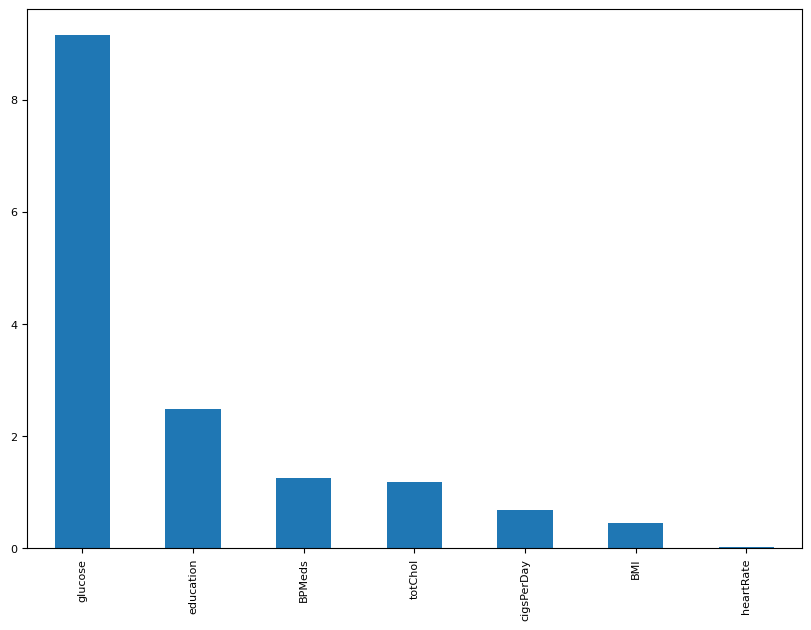

In [7]:
null_per.plot(kind = "bar" , figsize = [10,7] , fontsize = 8);

In [8]:
data.dropna(axis=0,inplace=True)

In [224]:
data.shape

(3658, 14)

# Skweed Data

In [11]:
numerical_features=data.drop(['male','currentSmoker','prevalentStroke','prevalentHyp','diabetes','TenYearCHD'],axis=1).columns

In [12]:
numerical_features

Index(['age', 'education', 'cigsPerDay', 'BPMeds', 'totChol', 'sysBP', 'diaBP',
       'BMI', 'heartRate', 'glucose'],
      dtype='object')

In [13]:
data[numerical_features].skew().sort_values(ascending=False)

glucose       6.281911
BPMeds        5.478217
cigsPerDay    1.228866
sysBP         1.163611
BMI           0.999606
diaBP         0.709407
education     0.688616
heartRate     0.670839
totChol       0.664334
age           0.232006
dtype: float64

In [14]:
high_skew = []
for i in numerical_features:
    if abs(data[i].skew()) > 1:
        high_skew.append(i)
high_skew

['cigsPerDay', 'BPMeds', 'sysBP', 'glucose']

C:\Users\Dalia\AppData\Local\Temp\ipykernel_14616\1494472868.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[high_skew[i]])
C:\Users\Dalia\AppData\Local\Temp\ipykernel_14616\1494472868.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[high_skew[i]])
C:\Users\Dalia\AppData\Local\T

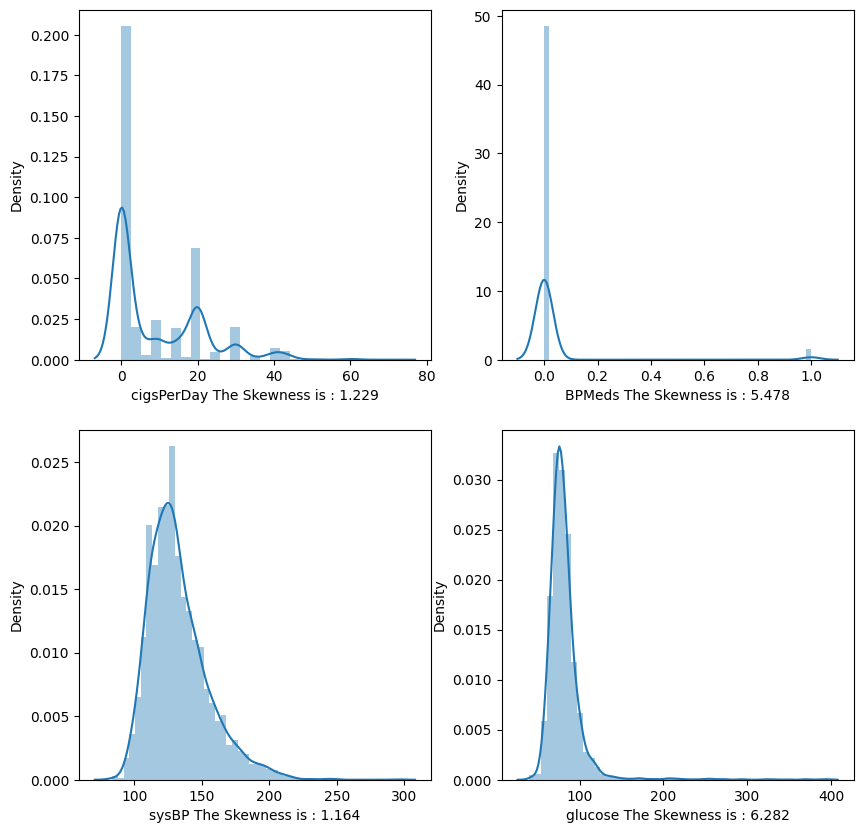

In [15]:
plt.figure(figsize = [10 , 10])

for i in range(len(high_skew)):
    plt.subplot(2 , 2 , i + 1)
    sns.distplot(data[high_skew[i]])
    skewness = data[high_skew[i]].skew()
    plt.xlabel(high_skew[i] + " The Skewness is : " + str(round(skewness,3)));

In [16]:
for i in range(len(high_skew)):
    data[high_skew[i]] = np.log1p(data[high_skew[i]])

C:\Users\Dalia\AppData\Local\Temp\ipykernel_14616\1494472868.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[high_skew[i]])
C:\Users\Dalia\AppData\Local\Temp\ipykernel_14616\1494472868.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[high_skew[i]])
C:\Users\Dalia\AppData\Local\T

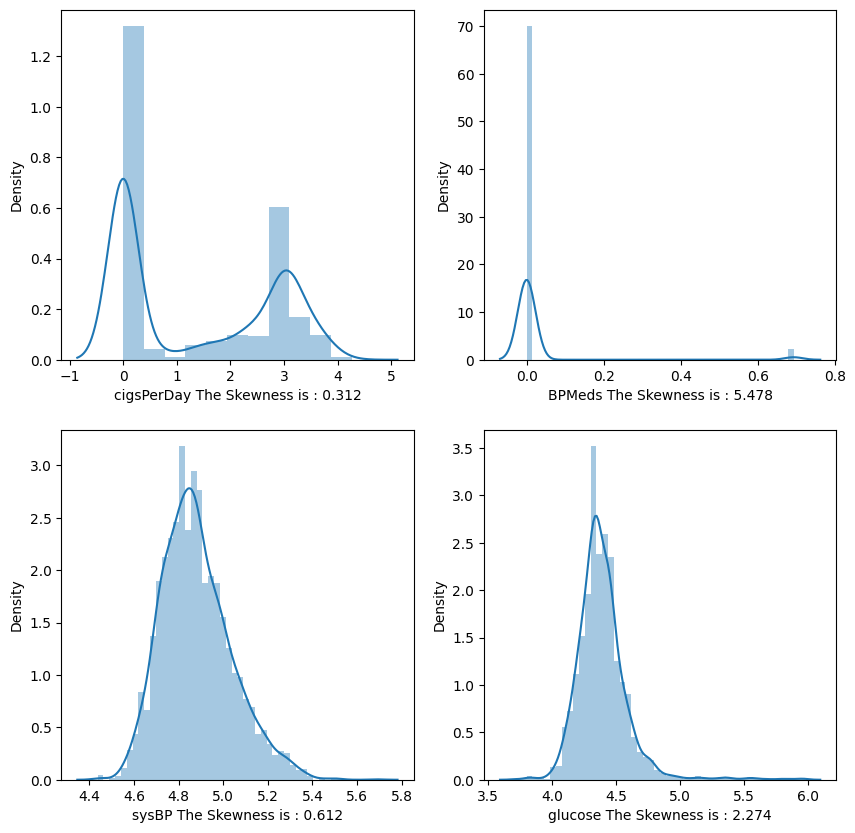

In [17]:
plt.figure(figsize = [10 , 10])

for i in range(len(high_skew)):
    plt.subplot(2 , 2 , i + 1)
    sns.distplot(data[high_skew[i]])
    skewness = data[high_skew[i]].skew()
    plt.xlabel(high_skew[i] + " The Skewness is : " + str(round(skewness,3)));

# Feature Selection using Chi Square (Category)

The Chi-Square test is a statistical method used to assess the association between categorical variables by comparing observed frequencies to expected frequencies to determine if deviations from the expectation are significant.

In [20]:
categorical_features=data[['male','currentSmoker','BPMeds','prevalentStroke','prevalentHyp','diabetes']]

In [21]:
categorical_features

,male,currentSmoker,BPMeds,prevalentStroke,prevalentHyp,diabetes
0,1,0,0.0,0,0,0
1,0,0,0.0,0,0,0
2,1,1,0.0,0,0,0
3,0,1,0.0,0,1,0
4,0,1,0.0,0,0,0
...,...,...,...,...,...,...
4233,1,1,0.0,0,1,0
4234,1,1,0.0,0,0,0
4237,0,0,0.0,0,0,0
4238,1,0,0.0,0,1,0


In [22]:
from sklearn.feature_selection import chi2
x = categorical_features
y = data['TenYearCHD']

In [23]:
chi_scores = chi2(x, y)

In [24]:
chi_scores

(array([17.10775088,  0.68647384, 19.54090634,  8.5078328 , 82.84545536,
        31.06762071]),
 array([3.53178759e-05, 4.07366355e-01, 9.84683480e-06, 3.53620967e-03,
        8.87260079e-20, 2.49193807e-08]))

<Axes: >

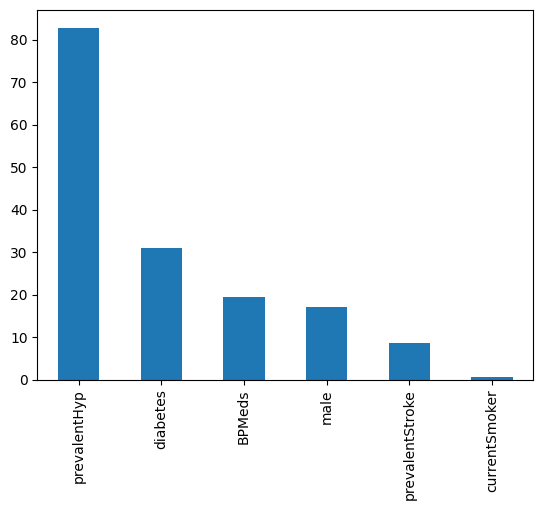

In [25]:
# higher the chi value, higher the importance
chi_values = pd.Series(chi_scores[0], index=x.columns)
chi_values.sort_values(ascending=False, inplace=True)
chi_values.plot.bar()

<Axes: >

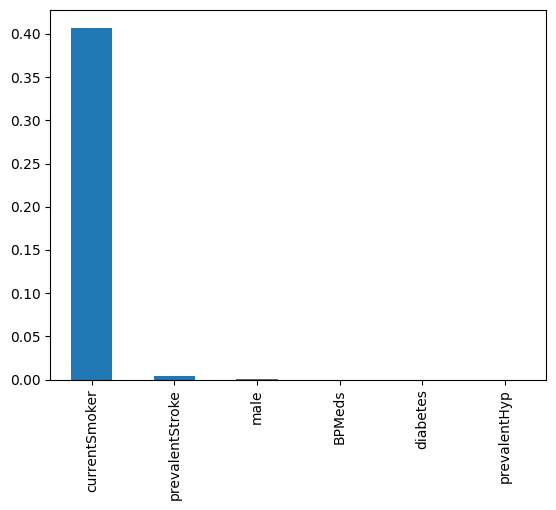

In [26]:
# if p-value > 0.05, lower the importance
p_values = pd.Series(chi_scores[1], index=x.columns)
p_values.sort_values(ascending=False, inplace=True)
p_values.plot.bar()

In [27]:
data_features = data.drop(['currentSmoker'], axis=1)
data_features.head()

,male,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0.000000,0.0,0,0,0,195.0,4.672829,70.0,26.97,80.0,4.356709,0
1,0,46,2.0,0.000000,0.0,0,0,0,250.0,4.804021,81.0,28.73,95.0,4.343805,0
2,1,48,1.0,3.044522,0.0,0,0,0,245.0,4.855929,80.0,25.34,75.0,4.262680,0
3,0,61,3.0,3.433987,0.0,0,1,0,225.0,5.017280,95.0,28.58,65.0,4.644391,1
4,0,46,3.0,3.178054,0.0,0,0,0,285.0,4.875197,84.0,23.10,85.0,4.454347,0


In this dataset, the p-value for the 'is_smoking' feature is greater than 0.05. Therefore, we fail to reject the null hypothesis, indicating that this feature is not statistically significant for our analysis.

# SMOTE

SMOTE(Synthetic Minority Oversampling Technique) generates synthetic samples for the minority class samples to balance imbalanced datasets
and it does that by finding its k-nearest neighbors, and generating new points along the lines connecting it to one or more of these neighbors

In [31]:
x = data_features.iloc[:, 0:14]
y = data_features.iloc[:, 14]

In [32]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter

In [33]:
# The numbers before SMOTE
num_before = dict(Counter(y))

# Perform SMOTE
# Define Pipeline
over=SMOTE(sampling_strategy=0.8)
under=RandomUnderSampler(sampling_strategy=0.8)
steps=[("o",over),("u",under)]
pipeline = Pipeline(steps=steps)

# Transform the dataset
X_smote,y_smote=pipeline.fit_resample(x,y)

# The numbers after SMOTE
num_after=dict(Counter(y_smote))

In [34]:
print(num_before,num_after)

{0: 3101, 1: 557} {0: 3100, 1: 2480}


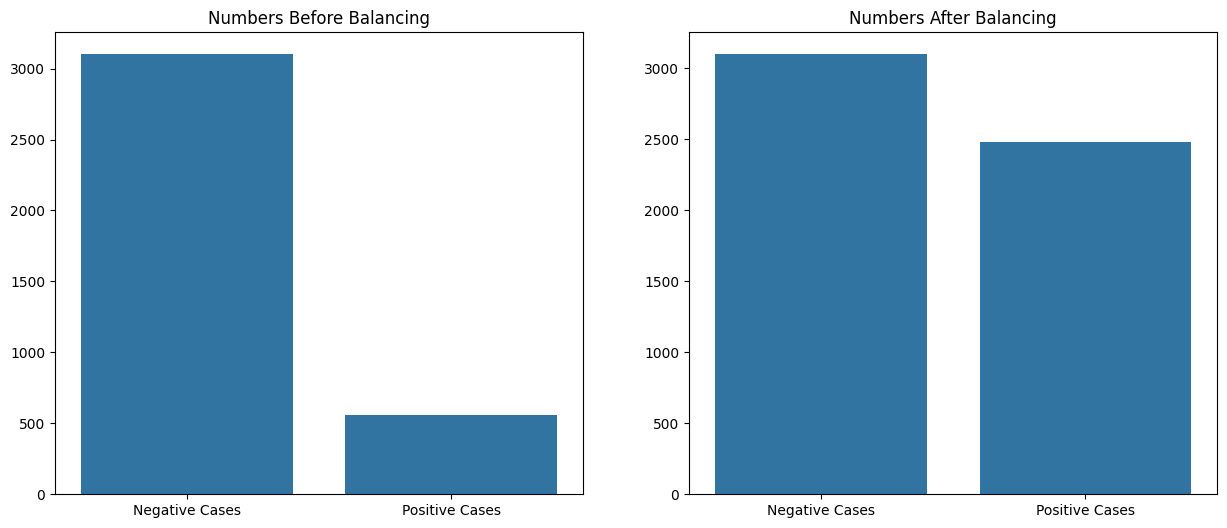

In [35]:
labels = ["Negative Cases","Positive Cases"]
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.barplot(x=labels, y=list(num_before.values()))
plt.title("Numbers Before Balancing")
plt.subplot(1,2,2)
sns.barplot(x=labels, y=list(num_after.values()))
plt.title("Numbers After Balancing")
plt.show()

In [150]:
# new dataset
new_data = pd.concat([pd.DataFrame(X_smote), pd.DataFrame(y_smote)], axis=1)
new_data.columns = ['male','age','education' ,'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp',
'diabetes', 'totChol', 'sysBP', 'diaBP','BMI', 'heartRate', 'glucose', 'TenYearCHD']
new_data.head()

,male,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3348,0,38,3.0,3.044522,0.0,0,0,0,167.0,4.663439,70.0,19.76,80.0,4.394449,0
2172,0,37,3.0,2.772589,0.0,0,0,0,222.0,4.709530,71.0,18.30,80.0,4.219508,0
2451,1,52,2.0,3.044522,0.0,0,0,0,240.0,4.912655,82.0,27.73,100.0,4.477337,0
3187,1,43,1.0,3.713572,0.0,0,1,0,212.0,4.912655,86.0,30.22,100.0,4.330733,0
3564,1,46,1.0,3.044522,0.0,0,0,0,247.0,4.905275,96.0,32.47,80.0,4.290459,0


# scaling the data

Standard Scaling transforms features to have a mean of 0 and a standard deviation of 1, helping to normalize data by removing the influence of differing units or scales, which improves model performance.

In [152]:
X_new = new_data.iloc[:, 0:14]
y_new= new_data.iloc[:,-1]
X_new.head()

,male,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
3348,0,38,3.0,3.044522,0.0,0,0,0,167.0,4.663439,70.0,19.76,80.0,4.394449
2172,0,37,3.0,2.772589,0.0,0,0,0,222.0,4.709530,71.0,18.30,80.0,4.219508
2451,1,52,2.0,3.044522,0.0,0,0,0,240.0,4.912655,82.0,27.73,100.0,4.477337
3187,1,43,1.0,3.713572,0.0,0,1,0,212.0,4.912655,86.0,30.22,100.0,4.330733
3564,1,46,1.0,3.044522,0.0,0,0,0,247.0,4.905275,96.0,32.47,80.0,4.290459


In [154]:
y_new.head()

3348    0
2172    0
2451    0
3187    0
3564    0
Name: TenYearCHD, dtype: int64

In [156]:
from sklearn.preprocessing import StandardScaler

In [158]:
X_new_scaled=X_new.copy()

In [160]:
X_new_scaled[X_new_scaled.columns]=StandardScaler().fit_transform(X_new[X_new.columns])

In [162]:
X_new_scaled

,male,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
3348,-0.819243,-1.557393,1.113891,1.191550,-0.242788,-0.061463,-0.703973,-0.14115,-1.596337,-1.505192,-1.148469,-1.592677,0.348302,-0.082714
2172,-0.819243,-1.676627,1.113891,0.998815,-0.242788,-0.061463,-0.703973,-0.14115,-0.393621,-1.222572,-1.069375,-1.962309,0.348302,-0.890551
2451,1.220639,0.111883,0.077406,1.191550,-0.242788,-0.061463,-0.703973,-0.14115,-0.000005,0.022940,-0.199339,0.425108,2.054699,0.300041
3187,1.220639,-0.961223,-0.959078,1.665743,-0.242788,-0.061463,1.420510,-0.14115,-0.612297,0.022940,0.117038,1.055508,2.054699,-0.376938
3564,1.220639,-0.603521,-0.959078,1.191550,-0.242788,-0.061463,-0.703973,-0.14115,0.153068,-0.022313,0.907979,1.625146,0.348302,-0.562914
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5576,-0.819243,0.588819,-0.573110,-0.966274,-0.242788,-0.061463,-0.703973,-0.14115,-0.445499,0.945500,1.687999,0.290583,0.080561,0.002088
5577,-0.819243,0.111883,-0.763066,-0.966274,-0.242788,-0.061463,1.420510,-0.14115,-0.000005,1.591910,1.464132,0.867579,0.460514,-0.434246
5578,-0.819243,0.231117,1.113891,-0.023163,-0.242788,-0.061463,-0.703973,-0.14115,-0.218680,-0.374670,-0.465991,-0.181803,-0.014934,0.141357
5579,-0.819243,1.781160,0.867214,-0.966274,-0.242788,-0.061463,-0.703973,-0.14115,0.231682,-0.517678,-0.195540,-0.903398,-0.982260,-0.226716


# splitting training and testing data

In [165]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_new_scaled, y_new, test_size=0.2, random_state=42)

In [167]:
X_train=np.array(X_train)
X_test=np.array(X_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

In [169]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

# Decision Tree CLassifier

In [172]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier(random_state=42)

In [174]:
tree_clf=tree.fit(X_train,y_train)

In [176]:
tree_train_pred = tree_clf.predict(X_train)
tree_test_pred = tree_clf.predict(X_test)

tree_train_acc = accuracy_score(y_train , tree_train_pred)
tree_test_acc = accuracy_score(y_test , tree_test_pred)

tree_train_f1 = f1_score(y_train , tree_train_pred)
tree_test_f1 = f1_score(y_test , tree_test_pred)

In [178]:
print(tree_train_acc)
print(tree_test_acc)
print()
print(tree_train_f1)
print(tree_test_f1)

1.0
0.7903225806451613

1.0
0.7701375245579568


# svm

In [181]:
from sklearn.svm import SVC

In [183]:
svc_clf=SVC().fit(X_train,y_train)

In [184]:
svc_train_pred = svc_clf.predict(X_train)
svc_test_pred = svc_clf.predict(X_test)

svc_train_acc = accuracy_score(y_train , svc_train_pred)
svc_test_acc = accuracy_score(y_test , svc_test_pred)

svc_train_f1 = f1_score(y_train , svc_train_pred)
svc_test_f1 = f1_score(y_test , svc_test_pred)

In [186]:
print(svc_train_acc)
print(svc_test_acc)
print()
print(svc_train_f1)
print(svc_test_f1)

0.77665770609319
0.7455197132616488

0.740026075619296
0.69593147751606


# Ada Boost Classifier

In [190]:
from sklearn.ensemble import AdaBoostClassifier
adaboost=AdaBoostClassifier(random_state=42)

In [192]:
ada_clf=adaboost.fit(X_train,y_train)

C:\Users\Dalia\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [194]:
ada_train_pred = ada_clf.predict(X_train)
ada_test_pred = ada_clf.predict(X_test)

ada_train_acc = accuracy_score(y_train , ada_train_pred)
ada_test_acc = accuracy_score(y_test , ada_test_pred)

ada_train_f1 = f1_score(y_train , ada_train_pred)
ada_test_f1 = f1_score(y_test , ada_test_pred)

In [196]:
ada_test_pred = ada_clf.predict(data)


C:\Users\Dalia\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(


In [198]:
print('adaboost training accuracy :',ada_train_acc)
print('adaboost test accuracy :',ada_test_acc)
print()
print('adaboost training f1 score :',ada_train_f1)
print('adaboost test f1 score :',ada_test_f1)

adaboost training accuracy : 0.821236559139785
adaboost test accuracy : 0.8216845878136201

adaboost training f1 score : 0.7852529601722282
adaboost test f1 score : 0.7848648648648648


# tunning decision tree classifier

### now i will be tunning a decision tree classifier to use it in  the ada boost classifier

In [202]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

In [204]:
cv_sets = ShuffleSplit(n_splits = 5 , random_state = 42 , test_size = 0.2 , train_size = None)
scorer=make_scorer(f1_score)

In [206]:
from sklearn.tree import DecisionTreeClassifier
dtree= DecisionTreeClassifier(random_state=42)

In [208]:
params = {'max_depth':[6,8,10,12,13,14,15,16], 'min_samples_split': [2,3,4,5,6,7], 'min_samples_leaf':[1,2,3,4,5]}

tree_clf = GridSearchCV(dtree, param_grid=params, scoring=scorer , cv=cv_sets)

In [210]:
# train the model
tree_clf.fit(X_train,y_train)
tree_clf.best_params_

{'max_depth': 16, 'min_samples_leaf': 1, 'min_samples_split': 3}

In [211]:
tree_train_pred = tree_clf.predict(X_train)
tree_test_pred = tree_clf.predict(X_test)

tree_train_acc = accuracy_score(y_train , tree_train_pred)
tree_test_acc = accuracy_score(y_test , tree_test_pred)

tree_train_f1 = f1_score(y_train , tree_train_pred)
tree_test_f1 = f1_score(y_test , tree_test_pred)

In [212]:
print('tree best classifier training accuracy :',tree_train_acc)
print('AdaBoost best classifier test accuracy :',tree_test_acc)
print()
print('tree best classifier training f1 score :',tree_train_f1)
print('tree best classifier training f1 score :',tree_test_f1)

tree best classifier training accuracy : 0.982078853046595
AdaBoost best classifier test accuracy : 0.7894265232974911

tree best classifier training f1 score : 0.9798081776880363
tree best classifier training f1 score : 0.7642928786359077


# tunning Ada Boost Classifier

In [74]:
from sklearn.ensemble import AdaBoostClassifier
adaboost=AdaBoostClassifier(random_state=42)

base_est=DecisionTreeClassifier(random_state=42, max_depth = 14 , min_samples_leaf = 3 , min_samples_split = 2)

In [75]:
adaboost.get_params()

{'algorithm': 'SAMME.R',
 'estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': 42}

In [76]:
params = { 'n_estimators' : [10,20,30,40,50] , 'learning_rate' :[20 ,10 , 5 , 1 , 0.5 ] , 'estimator': [base_est] , 'algorithm' : ['SAMME'] }

ada_clf = GridSearchCV(adaboost, param_grid=params, scoring=scorer , cv=cv_sets)

In [77]:
# train the model
ada_clf.fit(X_train,y_train)
best_clf = ada_clf.best_estimator_

In [78]:
best_clf.get_params()

{'algorithm': 'SAMME',
 'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': 14,
 'estimator__max_features': None,
 'estimator__max_leaf_nodes': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 3,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__monotonic_cst': None,
 'estimator__random_state': 42,
 'estimator__splitter': 'best',
 'estimator': DecisionTreeClassifier(max_depth=14, min_samples_leaf=3, random_state=42),
 'learning_rate': 1,
 'n_estimators': 50,
 'random_state': 42}

In [79]:
ada_train_pred = best_clf.predict(X_train)
ada_test_pred = best_clf.predict(X_test)

ada_train_acc = accuracy_score(y_train , ada_train_pred)
ada_test_acc = accuracy_score(y_test , ada_test_pred)

ada_train_f1 = f1_score(y_train , ada_train_pred)
ada_test_f1 = f1_score(y_test , ada_test_pred)

In [80]:
print('AdaBoost best classifier training accuracy : ',ada_train_acc)
print('AdaBoost best classifier test accuracy : ',ada_test_acc)
print()
print('AdaBoost best classifier training f1_score : ',ada_train_f1)
print('AdaBoost best classifier test f1_score : ',ada_test_f1)

AdaBoost best classifier training accuracy :  1.0
AdaBoost best classifier test accuracy :  0.9059139784946236

AdaBoost best classifier training f1_score :  1.0
AdaBoost best classifier test f1_score :  0.8923076923076924


## GUI

In [87]:
import joblib

In [93]:
joblib.dump(best_clf, 'D://best_ada_model.pkl')


['D://best_ada_model.pkl']

In [101]:
scaler = StandardScaler().fit(X_train)
joblib.dump(scaler, 'D://scaler.pkl')

['D://scaler.pkl']

In [105]:
loaded_model = joblib.load('D://best_ada_model.pkl')
loaded_scaler=joblib.load('D://scaler.pkl')

In [125]:
y_predict=loaded_model.predict(X_test)
ada_test_ac = accuracy_score(y_test , ada_test_pred)
ada_test_ac

0.9059139784946236

In [253]:
import numpy as np
import pandas as pd
import joblib
from tkinter import *

# Function for log transformation
def log_transform(df, columns):
    df_log = df.copy()
    for col in columns:
        df_log[col] = np.log1p(df[col])  
    return df_log

def predict_heart_disease():
    # Get user input from the GUI
    age = int(entry_age.get())
    education = int(entry_education.get())
    cigsPerDay = float(entry_cigsPerDay.get())
    BPMeds = float(entry_BPMeds.get())
    prevalentStroke = int(entry_prevalentStroke.get())
    prevalentHyp = int(entry_prevalentHyp.get())
    diabetes = int(entry_diabetes.get())
    totChol = float(entry_totChol.get())
    sysBP = float(entry_sysBP.get())
    diaBP = float(entry_diaBP.get())
    BMI = float(entry_BMI.get())
    heartRate = float(entry_heartRate.get())
    glucose = float(entry_glucose.get())
    
    sex_input = entry_sex.get().strip().lower()
    if sex_input == 'f':
        sex = 0
    elif sex_input == 'm':
        sex = 1
    else:
        result_label.config(text="Invalid input for sex. Please enter 'f' or 'm'.")
        return  

    X_new = pd.DataFrame([[age, education, cigsPerDay, BPMeds, prevalentStroke, prevalentHyp, diabetes, 
                           totChol, sysBP, diaBP, BMI, heartRate, glucose, sex]],
                         columns=['age', 'education', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 
                                  'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 
                                  'BMI', 'heartRate', 'glucose', 'male'])

    log_columns = ['cigsPerDay', 'BPMeds', 'sysBP', 'glucose']
    X_new_log = log_transform(X_new, log_columns)

    scaler = joblib.load('scaler.pkl')
    model = joblib.load('best_adaboost_model.pkl')

    X_new_scaled = scaler.transform(X_new_log)

    prediction = model.predict(X_new_scaled)

    if prediction[0] == 1:
        result_text = "Prediction: High risk of heart disease (TenYearCHD = 1)"
    else:
        result_text = "Prediction: Low risk of heart disease (TenYearCHD = 0)"

    result_label.config(text=result_text)

root = Tk()
root.title("Heart Disease Prediction")

Label(root, text="Age").grid(row=0)
Label(root, text="Education").grid(row=1)
Label(root, text="Cigs Per Day").grid(row=2)
Label(root, text="BPMeds").grid(row=3)
Label(root, text="Prevalent Stroke").grid(row=4)
Label(root, text="Prevalent Hyp").grid(row=5)
Label(root, text="Diabetes").grid(row=6)
Label(root, text="Tot Chol").grid(row=7)
Label(root, text="SysBP").grid(row=8)
Label(root, text="DiaBP").grid(row=9)
Label(root, text="BMI").grid(row=10)
Label(root, text="Heart Rate").grid(row=11)
Label(root, text="Glucose").grid(row=12)
Label(root, text="Sex").grid(row=13)


entry_age = Entry(root)
entry_education = Entry(root)
entry_cigsPerDay = Entry(root)
entry_BPMeds = Entry(root)
entry_prevalentStroke = Entry(root)
entry_prevalentHyp = Entry(root)
entry_diabetes = Entry(root)
entry_totChol = Entry(root)
entry_sysBP = Entry(root)
entry_diaBP = Entry(root)
entry_BMI = Entry(root)
entry_heartRate = Entry(root)
entry_glucose = Entry(root)
entry_sex=Entry(root)

# Position input fields in the grid
entry_age.grid(row=0, column=1)
entry_education.grid(row=1, column=1)
entry_cigsPerDay.grid(row=2, column=1)
entry_BPMeds.grid(row=3, column=1)
entry_prevalentStroke.grid(row=4, column=1)
entry_prevalentHyp.grid(row=5, column=1)
entry_diabetes.grid(row=6, column=1)
entry_totChol.grid(row=7, column=1)
entry_sysBP.grid(row=8, column=1)
entry_diaBP.grid(row=9, column=1)
entry_BMI.grid(row=10, column=1)
entry_heartRate.grid(row=11, column=1)
entry_glucose.grid(row=12, column=1)
entry_sex.grid(row=13, column=1)

Button(root, text="Predict", command=predict_heart_disease).grid(row=14, column=1)

result_label = Label(root, text="")
result_label.grid(row=15, column=1)

root.mainloop()


C:\Users\Dalia\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
C:\Users\Dalia\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


# mlflow

In [82]:


best_max_debth=base_est.get_params()["max_depth"]
best_min_s_leaf=base_est.get_params()["min_samples_leaf"]
best_min_s_split=base_est.get_params()["min_samples_split"]
best_n_est = best_clf.get_params()["n_estimators"]
best_learn_r = best_clf.get_params()["learning_rate"]

In [83]:
import mlflow
mlflow.set_experiment('heart disease')
with mlflow.start_run(run_name='test 1') as run: # i will change the run name this time

    mlflow.log_param('best_max_depth',best_max_debth)#show input max depth on mlfow ui
    mlflow.log_param('best min samle per leaf' ,best_min_s_leaf)#show input min samle per leaf on mlflow ui
    mlflow.log_param('best min samle per split' ,best_min_s_split)#show input min samle per split on mlflow ui
    mlflow.log_param('best number of estimators' ,best_n_est)
    mlflow.log_param('best learning rate' ,best_learn_r)
    mlflow.log_metric('best accuracy' ,ada_test_acc)
    mlflow.log_metric('best f1_score' ,ada_test_f1)
    mlflow.sklearn.log_model(best_clf,"best tuned model")

ModuleNotFoundError: No module named 'mlflow'

In [ ]:
import mlflow
logged_model = 'runs:/97f7271fffcf48f186f4c8e255d17869/best tuned model'

# Load model as a PyFuncModel.
loaded_model = mlflow.pyfunc.load_model(logged_model)

# Predict on a Pandas DataFrame.
import pandas as pd
y_pred=loaded_model.predict(X_test)
f1_test=f1_score(y_pred, y_test)
print('The testing F1 Score is', f1_test)
test_accuracy = accuracy_score(y_test,y_pred )
print('The test accuracy is', test_accuracy)